In [1]:
!pip install opencv-python numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline


In [11]:
def show_image(img, title='', cmap=None):
    plt.figure(figsize=(6,6))
    plt.imshow(img, cmap=cmap)                # Mostrar imagen :contentReference[oaicite:0]{index=0}
    plt.title(title)
    plt.axis('off')
    plt.show()                                 # Renderizar la figura :contentReference[oaicite:1]{index=1}


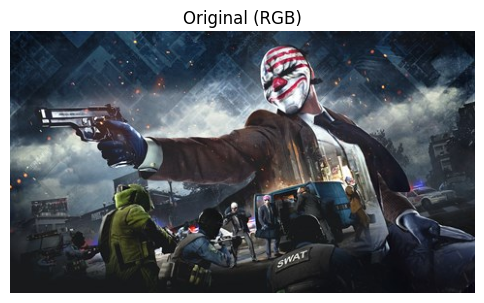

In [13]:
img_bgr = cv2.imread('Datos/Payday2.jpg')  # Carga en BGR
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
show_image(img_rgb, 'Original (RGB)')


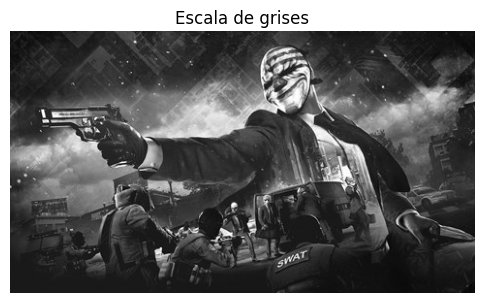

In [14]:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
show_image(gray, 'Escala de grises', cmap='gray')


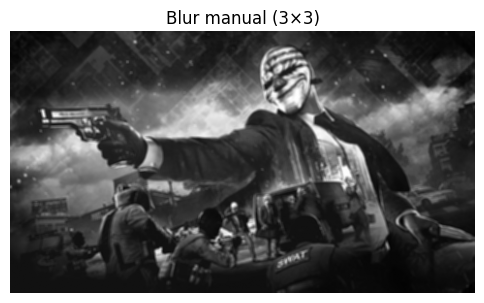

In [15]:
kernel_blur = np.ones((3,3), np.float32) / 9
blur_manual = cv2.filter2D(gray, -1, kernel_blur)   # filter2D realiza convolución :contentReference[oaicite:2]{index=2}
show_image(blur_manual, 'Blur manual (3×3)', cmap='gray')


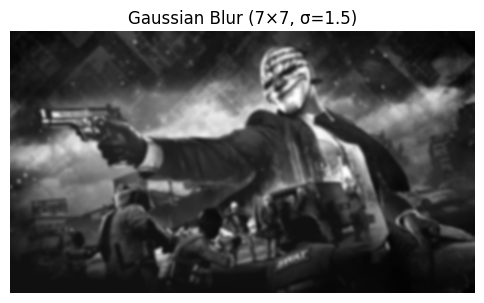

In [16]:
blur_gauss = cv2.GaussianBlur(gray, (7,7), sigmaX=1.5)
show_image(blur_gauss, 'Gaussian Blur (7×7, σ=1.5)', cmap='gray')


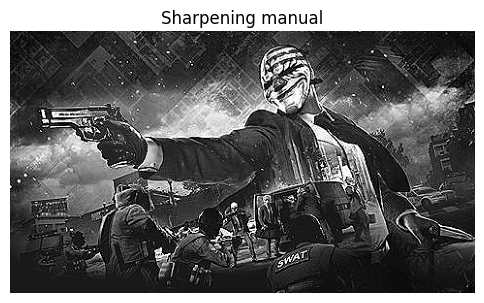

In [17]:
kernel_sharp = np.array([[ 0, -1,  0],
                         [-1,  5, -1],
                         [ 0, -1,  0]])
sharp_manual = cv2.filter2D(gray, -1, kernel_sharp)
show_image(sharp_manual, 'Sharpening manual', cmap='gray')

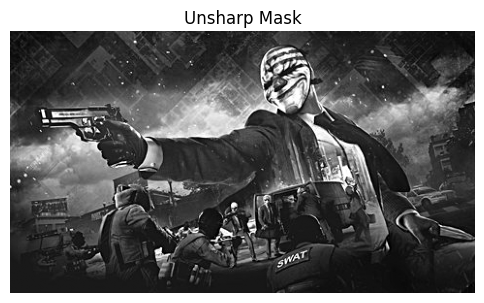

In [18]:

blur_for_unsharp = cv2.GaussianBlur(gray, (9,9), sigmaX=2)
unsharp = cv2.addWeighted(gray, 1.5, blur_for_unsharp, -0.5, 0)
show_image(unsharp, 'Unsharp Mask', cmap='gray')


In [25]:
blur_small = cv2.GaussianBlur(gray, (3,3), sigmaX=1)

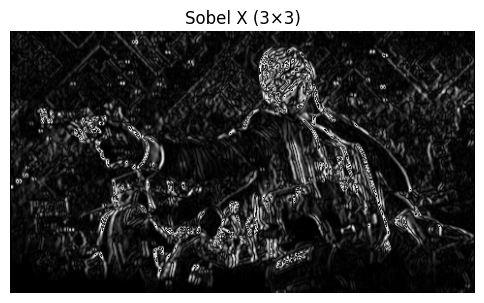

In [20]:
sobelx = cv2.Sobel(blur_small, cv2.CV_64F, dx=1, dy=0, ksize=3)
abs_sobelx = np.uint8(np.absolute(sobelx))
show_image(abs_sobelx, 'Sobel X (3×3)', cmap='gray')

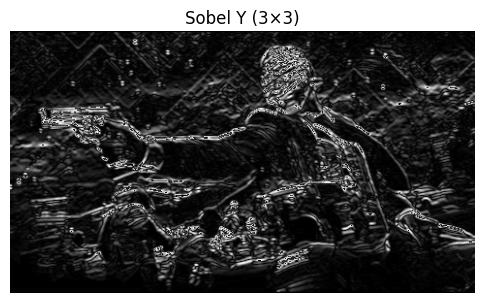

In [21]:
sobely = cv2.Sobel(blur_small, cv2.CV_64F, dx=0, dy=1, ksize=3)
abs_sobely = np.uint8(np.absolute(sobely))
show_image(abs_sobely, 'Sobel Y (3×3)', cmap='gray')

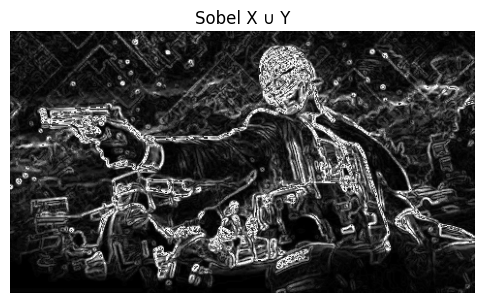

In [22]:
sobel_combined = cv2.bitwise_or(abs_sobelx, abs_sobely)
show_image(sobel_combined, 'Sobel X ∪ Y', cmap='gray')

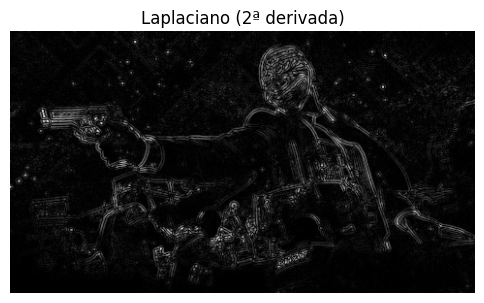

In [23]:
laplacian = cv2.Laplacian(blur_small, cv2.CV_64F)
abs_laplacian = np.uint8(np.absolute(laplacian))
show_image(abs_laplacian, 'Laplaciano (2ª derivada)', cmap='gray')

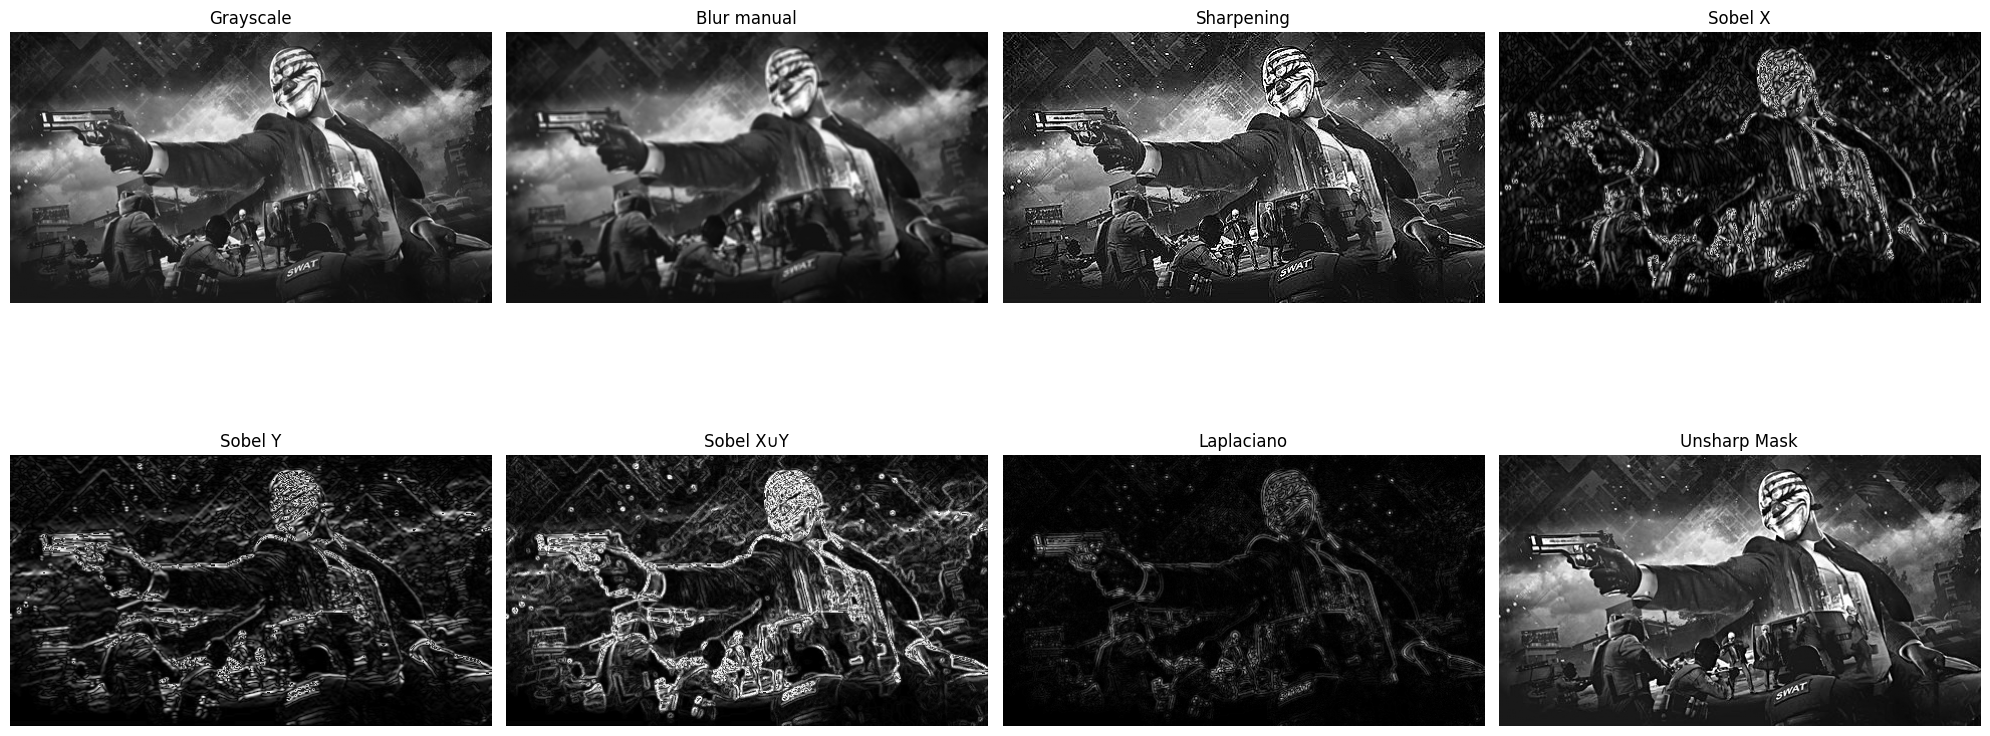

In [24]:
titles = ['Grayscale',
          'Blur manual',
          'Sharpening',
          'Sobel X',
          'Sobel Y',
          'Sobel X∪Y',
          'Laplaciano',
          'Unsharp Mask']
images = [gray, blur_manual, sharp_manual,
          abs_sobelx, abs_sobely, sobel_combined,
          abs_laplacian, unsharp]

plt.figure(figsize=(20,10))
for i, (img, title) in enumerate(zip(images, titles), 1):
    ax = plt.subplot(2, 4, i)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# 1. Definir la carpeta de salida
output_dir = 'resultados'
os.makedirs(output_dir, exist_ok=True)  # Crea directorio recursivamente si falta alguno :contentReference[oaicite:1]{index=1}

# 2. Diccionario de imágenes procesadas
#    Clave: nombre de archivo; Valor: matriz NumPy de la imagen
imagenes = {
    'grayscale.png': gray,
    'blur_manual.png': blur_manual,
    'gaussian_blur.png': blur_gauss,
    'sharpening_manual.png': sharp_manual,
    'unsharp_mask.png': unsharp,
    'sobel_x.png': abs_sobelx,
    'sobel_y.png': abs_sobely,
    'sobel_xy.png': sobel_combined,
    'laplacian.png': abs_laplacian
}

# 3. Guardar cada imagen en la carpeta
for filename, img in imagenes.items():
    path = os.path.join(output_dir, filename)
    success = cv2.imwrite(path, img)   # Guarda la imagen según la extensión del archivo :contentReference[oaicite:2]{index=2}
    if not success:
        print(f'Error al guardar {filename}')
    else:
        print(f'Guardado: {path}')

Guardado: resultados\grayscale.png
Guardado: resultados\blur_manual.png
Guardado: resultados\gaussian_blur.png
Guardado: resultados\sharpening_manual.png
Guardado: resultados\unsharp_mask.png
Guardado: resultados\sobel_x.png
Guardado: resultados\sobel_y.png
Guardado: resultados\sobel_xy.png
Guardado: resultados\laplacian.png
